This case study is based on the very famous dataset in machine learning 'The CreditRiskData'.The data contains information about 

The goal is to create a predictive model which can predict whether a person is likely to have good or bad credit. 

## Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and domain well before tying to apply any machine learning algorithm.
The data has one file "CreditRiskData.csv".This file contains       details.

In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import numpy as np
import pandas as pd
CreditRiskData=pd.read_csv(filepath_or_buffer="C:/Users/HP/OneDrive/Desktop/IVY PYTHON Assignment/Python IVY Feb-2024/Python Datasets/Classification Datasets/CreditRiskData.csv",
                       sep=',',encoding='latin_1')
print('Shape before deleting duplicate values:',CreditRiskData.shape)
# Remove duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape after deleting duplicate values:',CreditRiskData.shape)
# Printing sample data
# Identifying the qualitative/quantitative/categorical variables
CreditRiskData.head(10)

Shape before deleting duplicate values: (1000, 21)
Shape after deleting duplicate values: (1000, 21)


,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


## Defining the problem statement

Create a predictive model which can predict if a load application can be approved or not based on its characteristics like what is the duration, purpose and amount of loan

1. **Target Variable:** CreditRiskData
2. **Predictors:** Duration, purpose, amount of loan, etc..
3. **GoodCredit:**  1 usually represents the positive class (in this case, "good credit").
4. **GoodCredit:**  0 usually represents the negative class (in this case, "bad credit").

## Determining the type of Machine Learning

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical

## Looking at the distribution of Target Variable

<Axes: xlabel='GoodCredit'>

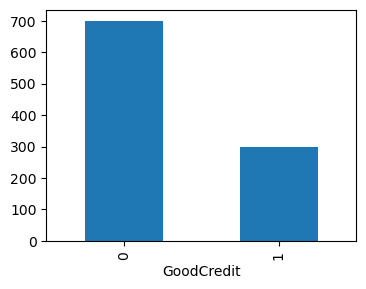

In [3]:
# Looking at the distribution of target variable
%matplotlib inline
# Creating bar chart as the target variable is categorical
GroupedData=CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar',figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further.There are sufficient number of rows for each category to learn from.

## Basic Data Exploration

In [4]:
# Looking at sample rows in the data
CreditRiskData.head()

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
# Observing the summarized statistics of the data
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GoodCredit       1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration2        1000 non-null   int64 
 3   history3         1000 non-null   object
 4   purpose4         1000 non-null   object
 5   amount5          1000 non-null   int64 
 6   savings6         1000 non-null   object
 7   employ7          1000 non-null   object
 8   installment8     1000 non-null   int64 
 9   status9          1000 non-null   object
 10  others10         1000 non-null   object
 11  residence11      1000 non-null   int64 
 12  property12       1000 non-null   object
 13  age13            1000 non-null   int64 
 14  otherplans14     1000 non-null   object
 15  housing15        1000 non-null   object
 16  cards16          1000 non-null   int64 
 17  job17            1000 non-null   o

In [6]:
# Looking at descriptive statistics of the data
CreditRiskData.describe(include='all')

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [7]:
# Finding unique values for each column
CreditRiskData.nunique()

GoodCredit           2
checkingstatus1      4
duration2           33
history3             5
purpose4            10
amount5            921
savings6             5
employ7              5
installment8         4
status9              4
others10             3
residence11          4
property12           4
age13               53
otherplans14         3
housing15            3
cards16              4
job17                4
liable18             2
tele19               2
foreign20            2
dtype: int64

## Basic Data Exploration Results

The selected columns in this step are final , further study will be done and then a final list will be created.

1. **GoodCredit:**  Categorical. Selected.This is the target variable.       
2. **checkingstatus1:** Categorical. Selected   
3. **duration2:** Continuous.Selected.     
4. **history3:** Categorical. Selected          
5. **purpose4:** Categorical. Selected         
6. **amount5:** Continuous.Selected.           
7. **savings6:** Categorical. Selected         
8. **employ7:** Categorical. Selected             
9. **installment8:** Continuous.Selected.         
10. **status9:** Categorical. Selected           
11. **others10:** Categorical. Selected            
12. **residence11:** Categorical. Selected          
13. **property12:** Categorical. Selected        
14. **age13:** Continuous.Selected.               
15. **otherplans14:** Categorical. Selected       
16. **housing15:** Categorical. Selected           
17. **cards16:** Categorical. Selected             
18. **job17:** Categorical. Selected             
19. **liable18:** Categorical. Selected            
20. **tele19:** Categorical. Selected             
21. **foreign20:** Categorical. Selected        

## Visual Exploratory Data Analysis

1. **Categorical Variables:** Bar Plot
2. **Continuous Variables:** Box Plot

### Visualize distribution of all the categorical predictor variables in the data using bar plots

Based on the Basic Data Exploration Results above, we have spotted five categorical predictors in the data.
    
**Categorical Predictors:** 'checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','residence11','property12','otherplans14',
 'housing15','cards16','job17','liable18','tele19','foreign20'  

In [8]:
# Plotting multiple bar charts at once for categorical columns
# Since there is no default function which can plot muktiple columns at once
# we are defining our own function for the same
def PlotBarCharts(inpData,colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig,subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot),figsize=(20,5))
    fig.suptitle('Bar charts of:' + str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot,range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

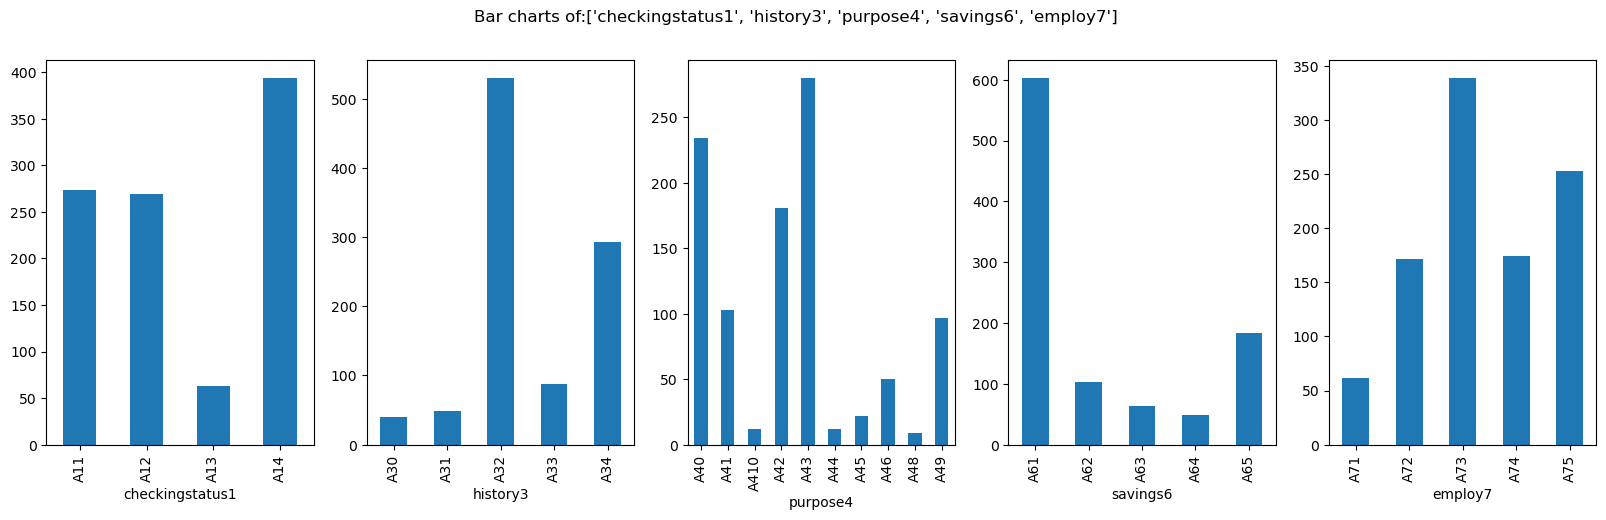

In [9]:
# Calling the Function
PlotBarCharts(CreditRiskData,colsToPlot=['checkingstatus1','history3','purpose4','savings6','employ7'])                                         

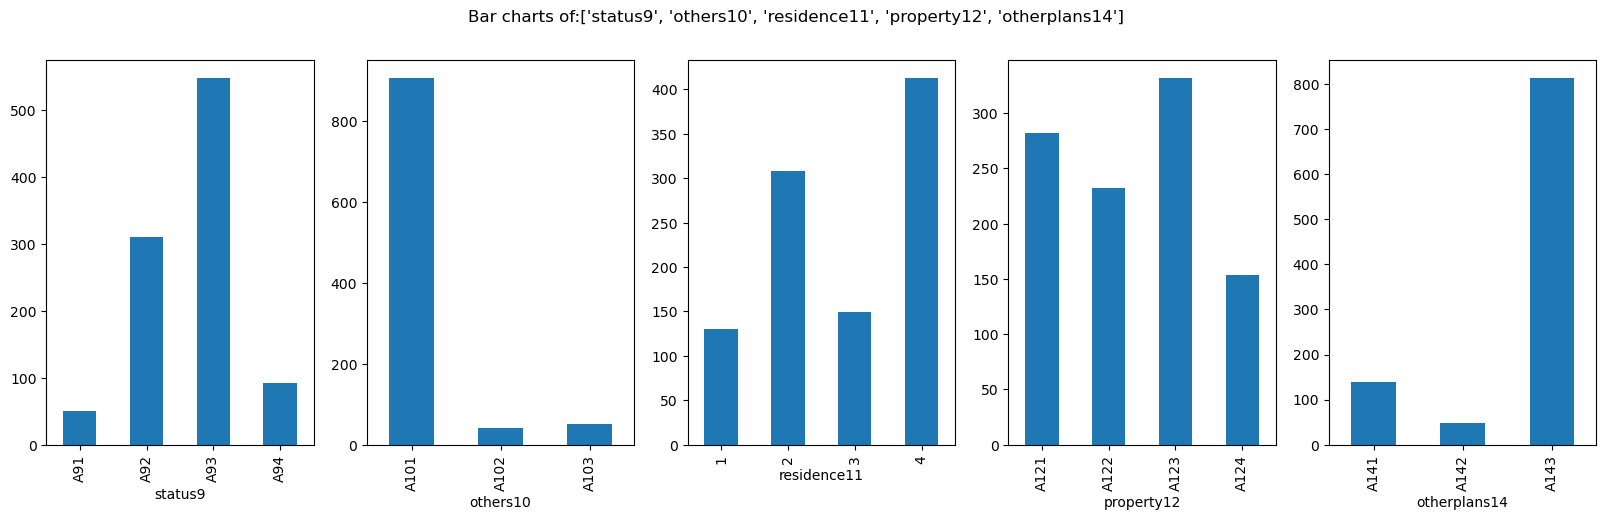

In [10]:
PlotBarCharts(CreditRiskData,colsToPlot=['status9','others10','residence11','property12','otherplans14'])                                        

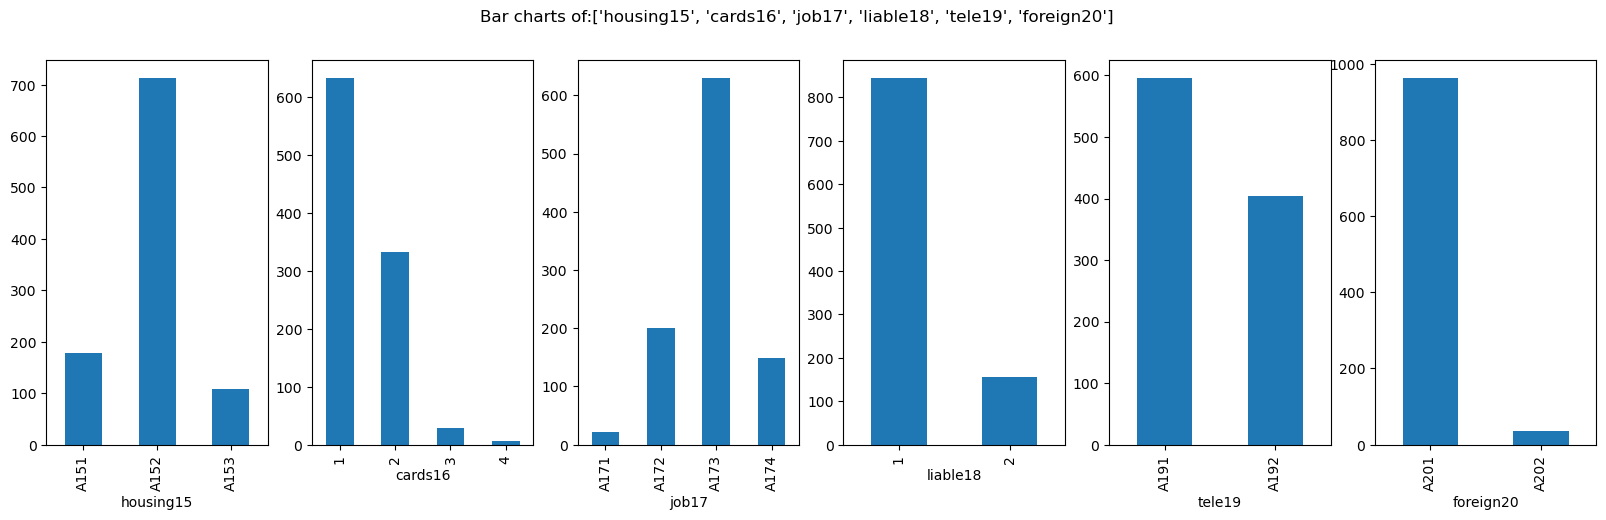

In [11]:
PlotBarCharts(CreditRiskData,colsToPlot=['housing15','cards16','job17','liable18','tele19','foreign20'])

## Treating imbalance in Categorical Predictors

In [12]:
CreditRiskData['cards16'][CreditRiskData['cards16']>=3]=3

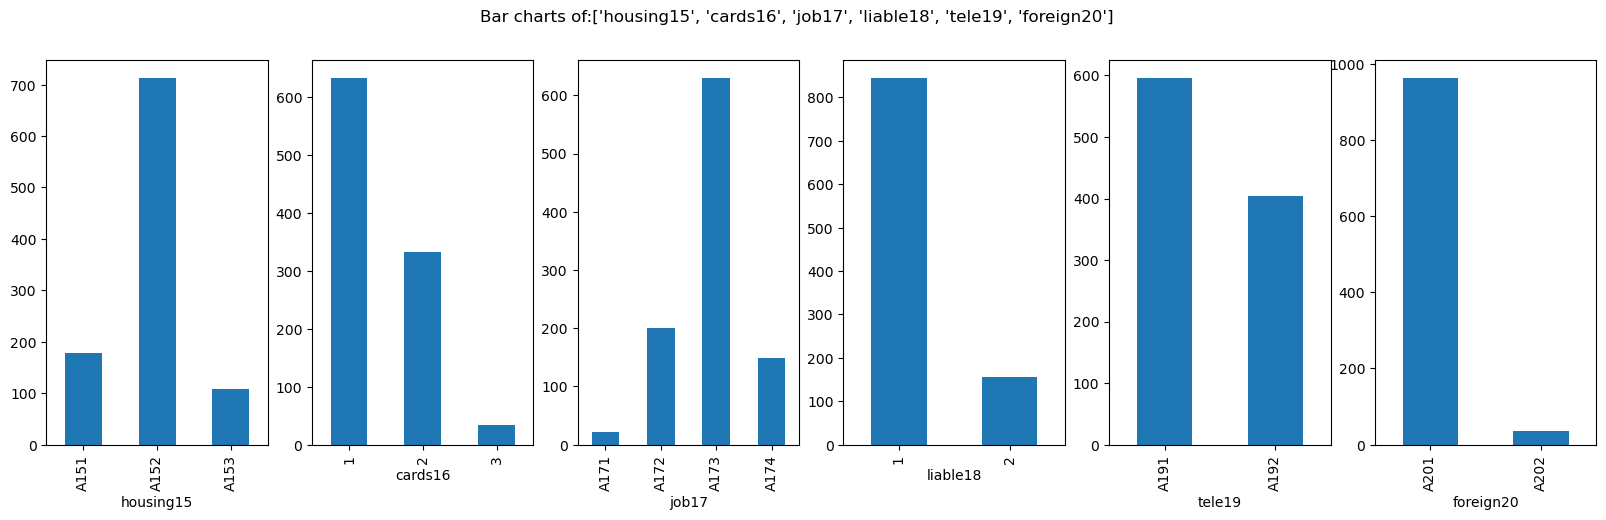

In [13]:
PlotBarCharts(CreditRiskData,colsToPlot=['housing15','cards16','job17','liable18','tele19','foreign20'])

## Bar Charts Interpretation

In this data, all the categorical columns have satisfactory distribution for further analysis.
'checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','residence11','property12','otherplans14', 'housing15','cards16','job17','liable18','tele19','foreign20'

### Visualize distribution of all the continuous predictors variables in the data  using histograms

Based on the Basic data Exploration, there are four continuoius predictor variables 'duration2', 'amount5', 'installment8' and 'age'.

array([[<Axes: title={'center': 'duration2'}>,
        <Axes: title={'center': 'amount5'}>],
       [<Axes: title={'center': 'installment8'}>,
        <Axes: title={'center': 'age13'}>]], dtype=object)

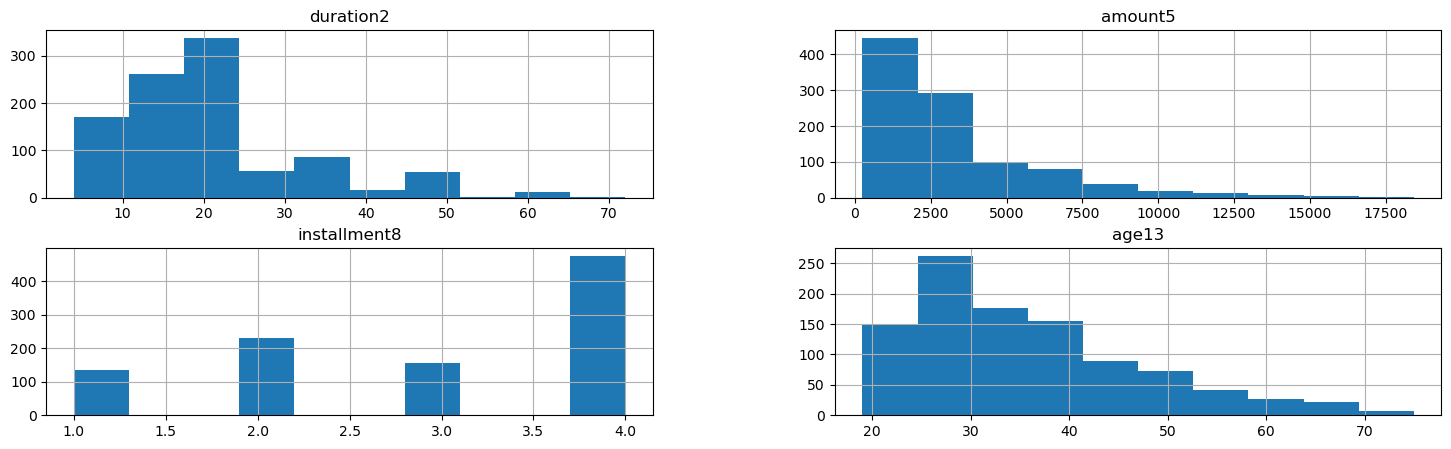

In [14]:
# Plotting histograms of multiple columns together
CreditRiskData.hist(['duration2', 'amount5', 'installment8','age13'],figsize=(18,5))

## Histogram Interpretation

**Selected Continuous Variables:**
    
1.**duration2:** Selected.Outliers seen beyond 70, need to treat them.
    
2.**amount5:** Selected.Outliers seen beyond 17500, need to treat them.
    
3.**installment8:** The distribution is good.

4.**age13:** The distribution is good.

## Outliers Treatment

### Replacing outliers for 'duration2'

In [15]:
CreditRiskData['duration2'][CreditRiskData['duration2']<70].sort_values(ascending=False)

672    60
938    60
374    60
373    60
134    60
       ..
943     4
527     4
314     4
234     4
734     4
Name: duration2, Length: 999, dtype: int64

Above result shows the nearest logical value is 60, hence, replacing any value above 70 with it.

In [16]:
CreditRiskData['duration2'][CreditRiskData['duration2']>70]=60

### Replacing outliers for amount5

In [17]:
CreditRiskData['amount5'][CreditRiskData['amount5']<17500].sort_values(ascending=False)

95     15945
818    15857
887    15672
637    15653
917    14896
       ...  
458      343
157      339
177      338
309      276
725      250
Name: amount5, Length: 999, dtype: int64

Above result shows the nearest logical value is 15945, hence replacing any value above 300 with it.

In [18]:
CreditRiskData['amount5'][CreditRiskData['amount5']>17500]=15945

### Visualize Distribution after outlier treatment

The distribution has improved after the outlier treatment.There is still a tail but it is thick, that means there are many values in that range, hence it is acceptable.

array([[<Axes: title={'center': 'duration2'}>,
        <Axes: title={'center': 'amount5'}>]], dtype=object)

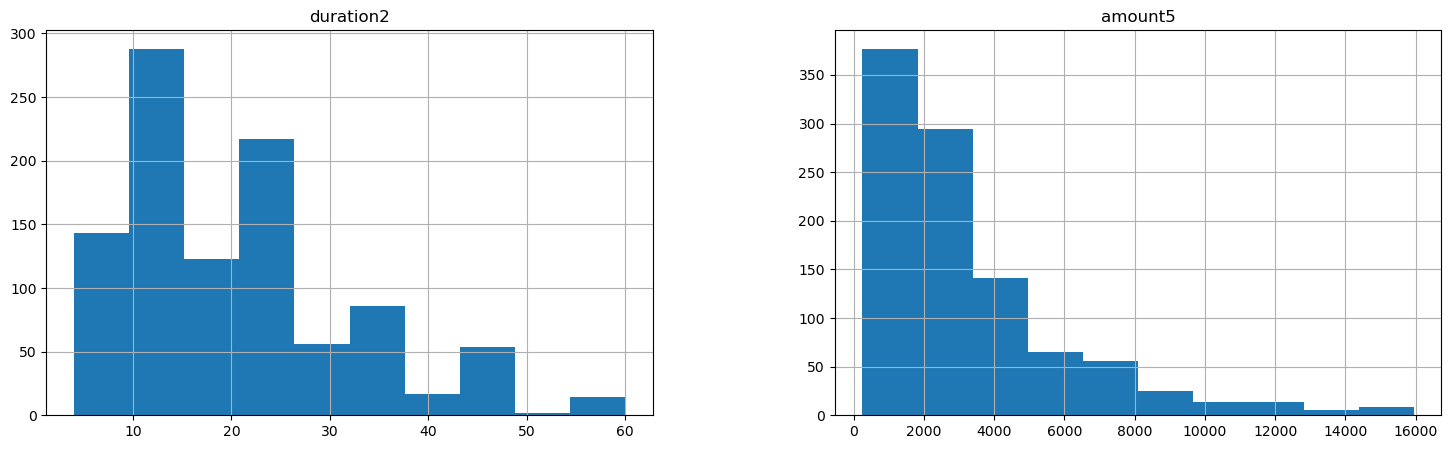

In [19]:
CreditRiskData.hist(['duration2','amount5'],figsize=(18,5))

## Missing Values Treatment

In [20]:
# Finding how many missing values are there for each column
CreditRiskData.isnull().sum()

GoodCredit         0
checkingstatus1    0
duration2          0
history3           0
purpose4           0
amount5            0
savings6           0
employ7            0
installment8       0
status9            0
others10           0
residence11        0
property12         0
age13              0
otherplans14       0
housing15          0
cards16            0
job17              0
liable18           0
tele19             0
foreign20          0
dtype: int64

## Feature Selection

### Relationship Exploration: Categorical vs Continuous------Box Plots

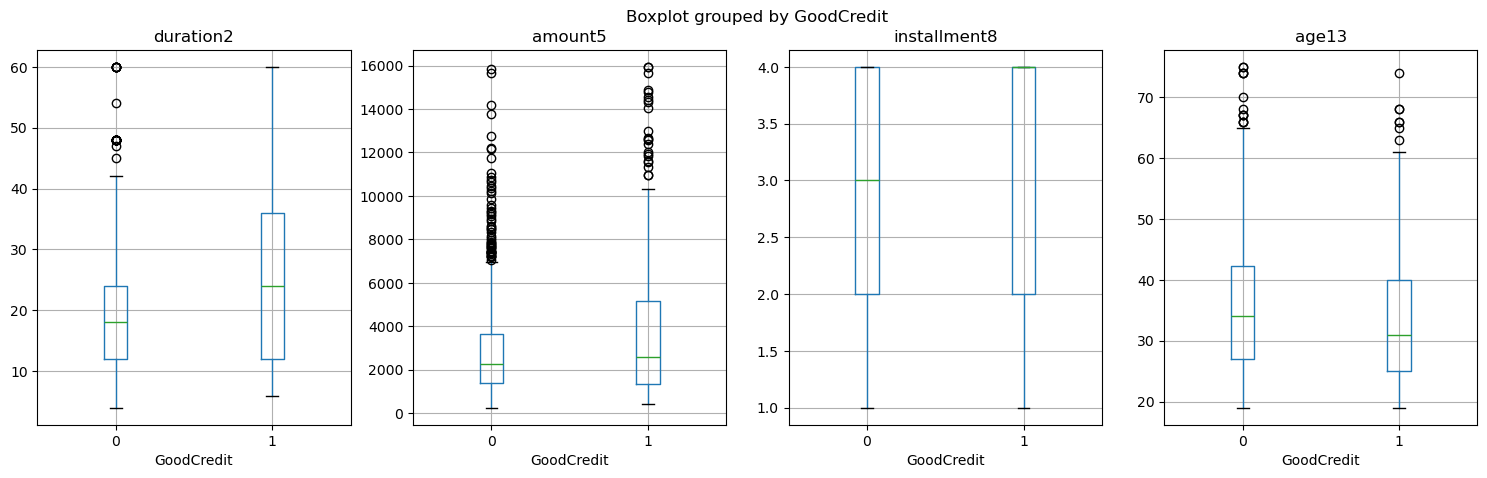

In [21]:
# Box Plot for categorical target variable'Goodcredit' and Continuous predictors duration2,amount5,installment8,age13
ContinuousColsList=['duration2','amount5','installment8','age13']
%matplotlib inline
import matplotlib.pyplot as plt
fig,PlotCanvas=plt.subplots(nrows=1,ncols=len(ContinuousColsList),figsize=(18,5))
# Creating Box Plot for each continuous predictor against the target variable 'Survived'
for PredictorCol, i in zip(ContinuousColsList,range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol,by='GoodCredit',figsize=(5,5),vert=True,ax=PlotCanvas[i])

### Box Plots Interpretation

We confirm this by looking at the ANOVA test below:-

### Statistical Feature Selection(Categorical Vs Continuous)------Using ANOVA test

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    
    # Create an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('#### ANOVA Results ####\n')
    for predictor in  ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        
        # If the ANOVA Results is < 0.05, that means we reject H0.
        if(AnovaResults[1]<0.05):
             print(predictor,'is correlated with',TargetVariable,'|P-Value:',AnovaResults[1])
             SelectedPredictors.append(predictor)
        else:
             print(predictor, 'is NOT correlated with', TargetVariable,'|P-Value:',AnovaResults[1])
    return (SelectedPredictors)

In [23]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables='duration2','amount5','installment8','age13'
FunctionAnova(inpData=CreditRiskData, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)         

#### ANOVA Results ####

duration2 is correlated with GoodCredit |P-Value: 7.652980999129875e-12
amount5 is correlated with GoodCredit |P-Value: 9.823517701458613e-07
installment8 is correlated with GoodCredit |P-Value: 0.022035486306960176
age13 is correlated with GoodCredit |P-Value: 0.003925339398278295


['duration2', 'amount5', 'installment8', 'age13']

#### Final selected Continuous Columns:
'duration2', 'amount5', 'installment8', 'age13'

### Relationship Exploration Categorical Vs Categorical-----Grouped Bar Plots

In [24]:
# Cross tabulation between two categorical variables
CrossTabResult=pd.crosstab(index=CreditRiskData['cards16'],columns=CreditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
cards16,,
1,433,200
2,241,92
3,26,8


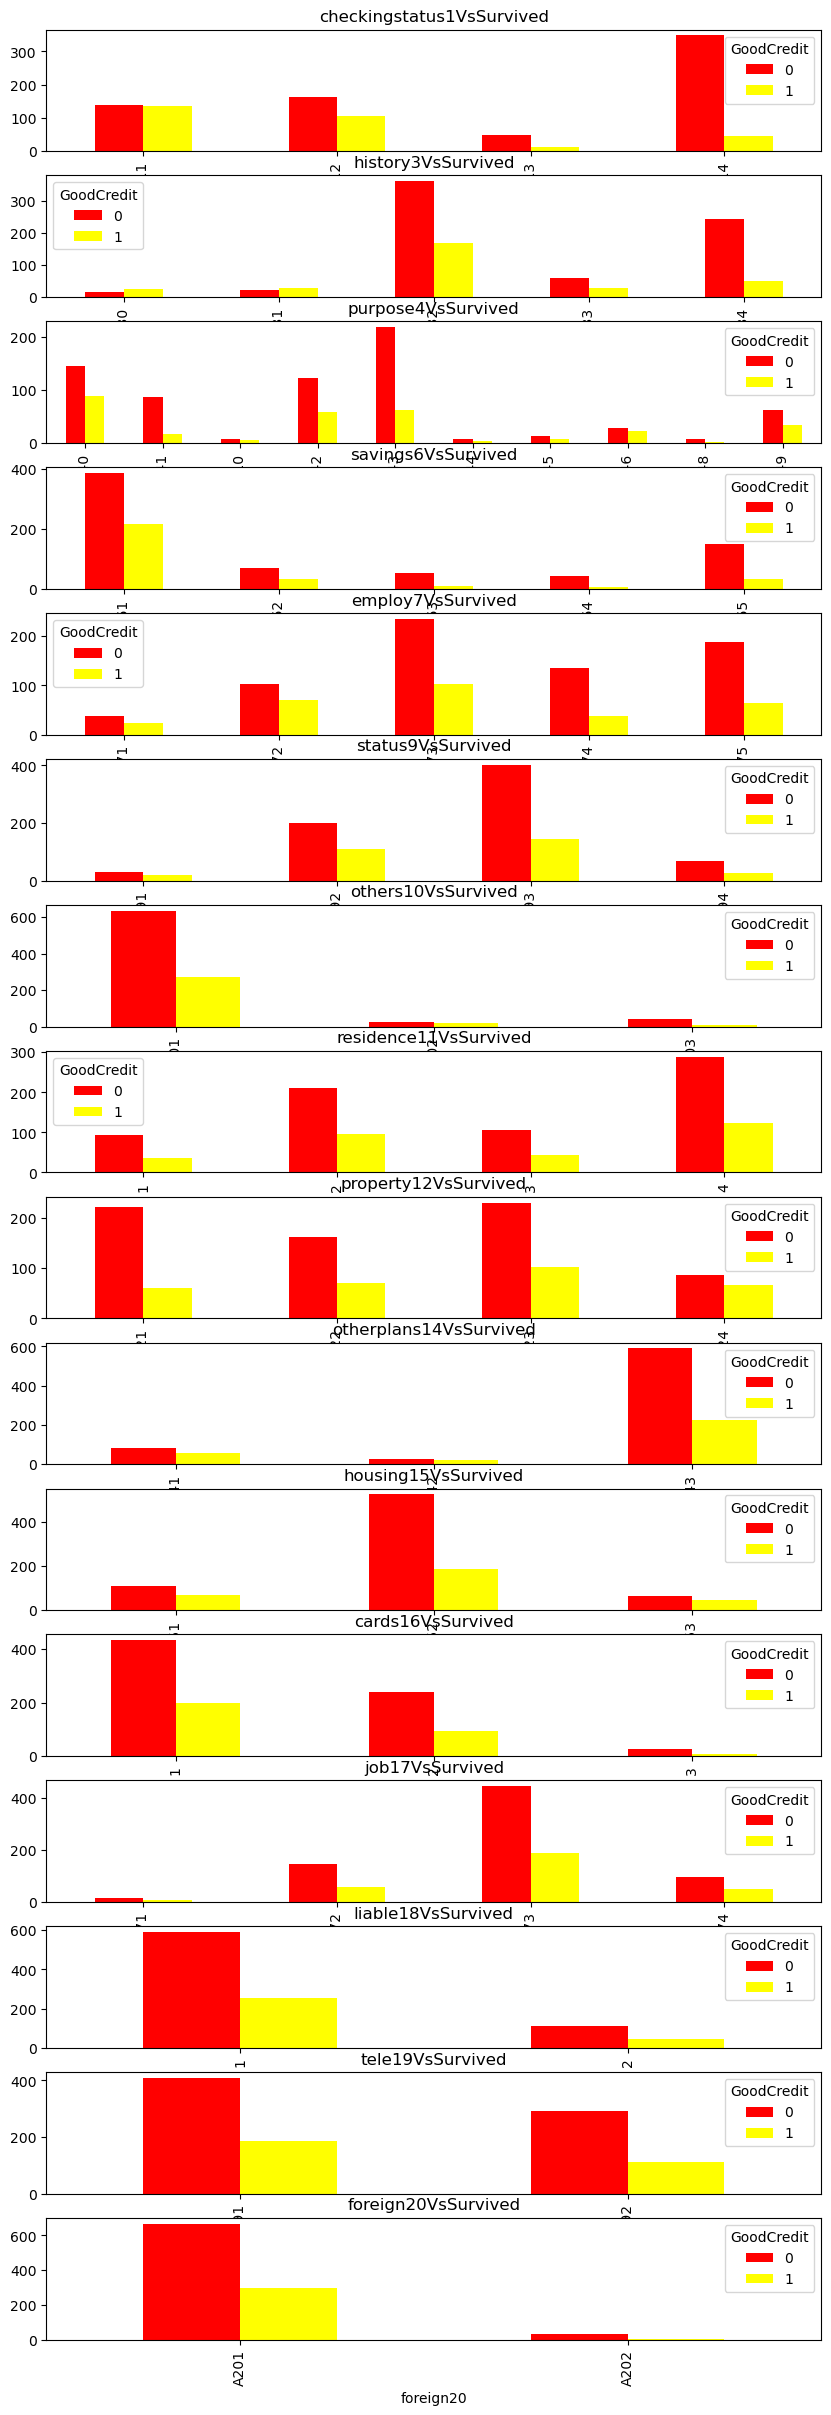

In [25]:
# Visual inference using grouped Bar Charts
CategoricalColsList=['checkingstatus1','history3','purpose4','savings6','employ7',
                     'status9','others10','residence11','property12','otherplans14', 'housing15','cards16','job17','liable18','tele19','foreign20']
%matplotlib inline
import matplotlib.pyplot as plt
fig,PlotCanvas=plt.subplots(nrows=len(CategoricalColsList),ncols=1,figsize=(10,30))
# Creating grouped bar plots for each ccategorical predictor against the Targer variable "Survived"
for CategoricalCol, i in zip(CategoricalColsList,range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol],columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','yellow'],ax=PlotCanvas[i],title=CategoricalCol+'Vs'+'Survived')

### Grouped Bar Charts Interpretation

In [26]:
# Writing a function to find the correlation of all categorical variables with the Target Variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating final list for empty selected predictors
    SelectedPredictors=[]
    print('#### Chisq Results ####\n')
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable],columns=inpData[predictor])
        ChiSqResult=chi2_contingency(CrossTabResult)
        # If chiSq Result is < 0.05, that means we reject H0.
        if(ChiSqResult[1]<0.05):
            print(predictor,'is correlated with',TargetVariable,'|P-Value:',ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor,'is NOT correlated with',TargetVariable,'|P-Value:',ChiSqResult[1])
    return(SelectedPredictors)                      

In [27]:
# Calling the function
CategoricalVariables=['checkingstatus1','history3','purpose4','savings6','employ7',
                     'status9','others10','residence11','property12','otherplans14', 'housing15','cards16','job17','liable18','tele19','foreign20']
FunctionChisq(inpData=CreditRiskData, TargetVariable='GoodCredit', CategoricalVariablesList=CategoricalVariables)

#### Chisq Results ####

checkingstatus1 is correlated with GoodCredit |P-Value: 1.2189020722893755e-26
history3 is correlated with GoodCredit |P-Value: 1.2791872956751013e-12
purpose4 is correlated with GoodCredit |P-Value: 0.00011574910079691586
savings6 is correlated with GoodCredit |P-Value: 2.7612142385682596e-07
employ7 is correlated with GoodCredit |P-Value: 0.001045452349140254
status9 is correlated with GoodCredit |P-Value: 0.02223800546926877
others10 is correlated with GoodCredit |P-Value: 0.036055954027247226
residence11 is NOT correlated with GoodCredit |P-Value: 0.8615521320413175
property12 is correlated with GoodCredit |P-Value: 2.8584415733250017e-05
otherplans14 is correlated with GoodCredit |P-Value: 0.0016293178186473534
housing15 is correlated with GoodCredit |P-Value: 0.00011167465374597684
cards16 is NOT correlated with GoodCredit |P-Value: 0.31071918790383346
job17 is NOT correlated with GoodCredit |P-Value: 0.5965815918843431
liable18 is NOT correlated with Goo

['checkingstatus1',
 'history3',
 'purpose4',
 'savings6',
 'employ7',
 'status9',
 'others10',
 'property12',
 'otherplans14',
 'housing15',
 'foreign20']

#### Finally Selected Categorical Variables

'checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14','housing15','foreign20'

## Label Encoding

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words.

In [28]:
SelectedColumns =['checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14',
                  'housing15','foreign20','duration2', 'amount5', 'installment8', 'age13']
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for SelectedColumns in CategoricalVariables:
    label_encoders[SelectedColumns] = LabelEncoder()
    CreditRiskData[SelectedColumns] = label_encoders[SelectedColumns].fit_transform(CreditRiskData[SelectedColumns])

## Selecting Final Predictors for Machine Learning

In [30]:
SelectedColumns =['checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14',
                  'housing15','foreign20','duration2', 'amount5', 'installment8', 'age13']
# Selecting Final columns
DataForML_Numeric=CreditRiskData[SelectedColumns]
DataForML_Numeric['GoodCredit']=CreditRiskData['GoodCredit']
# Printing sample rows
DataForML_Numeric.head()

,checkingstatus1,history3,purpose4,savings6,employ7,status9,others10,property12,otherplans14,housing15,foreign20,duration2,amount5,installment8,age13,GoodCredit
0,0,4,4,4,4,2,0,0,2,1,0,6,1169,4,67,0
1,1,2,4,0,2,1,0,0,2,1,0,48,5951,2,22,1
2,3,4,7,0,3,2,0,0,2,1,0,12,2096,2,49,0
3,0,2,3,0,3,2,2,1,2,2,0,42,7882,2,45,0
4,0,3,0,0,2,2,0,3,2,2,0,24,4870,3,53,1


In [31]:
DataForML_Numeric.to_pickle('DataForML_Numeric.pkl')

## Machine Learning: Splitting the data into Training and Testing Sample

In [32]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7',
       'status9', 'others10', 'property12', 'otherplans14', 'housing15',
       'foreign20', 'duration2', 'amount5', 'installment8', 'age13',
       'GoodCredit'],
      dtype='object')

In [35]:
# Seperate Targer Variable and Predictor Variable
TargetVariable='GoodCredit'
#Predictors=['checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7',
#       'status9', 'others10', 'property12', 'otherplans14', 'housing15',
#       'foreign20', 'duration2', 'amount5', 'installment8', 'age13']
# Demonstration fo deployment with final cols
Predictors=['checkingstatus1','duration2','history3',]
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
X_train[0:4]

array([[ 3, 24,  3],
       [ 3, 12,  2],
       [ 0, 30,  2],
       [ 1, 12,  4]], dtype=int64)

In [37]:
y_train[0:4]

array([0, 0, 0, 0], dtype=int64)

## Standardization/Normalization of Data

In [39]:
### Standardization of Data ###
from sklearn.preprocessing import StandardScaler,MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 3)
(700,)
(300, 3)
(300,)


In [41]:
X_train[0:4]

array([[1.        , 0.35714286, 0.75      ],
       [1.        , 0.14285714, 0.5       ],
       [0.        , 0.46428571, 0.5       ],
       [0.33333333, 0.14285714, 1.        ]])

In [42]:
# Inverse Transform will bring back the original scale
print(PredictorScalerFit.inverse_transform(X)[0:4])

[[ 0.  6.  4.]
 [ 1. 48.  2.]
 [ 3. 12.  4.]
 [ 0. 42.  2.]]


## Logistic Regression

In [43]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# choose parameter penalty Penalty ='L1' or C=1
# choose different values for solver 'newton-cg'.
clf=LogisticRegression(C=3,penalty='l2',solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictors on Testing Data
prediction=LOG.predict(X_test)

# printing some rows to see the prediction in the test data
TestData=pd.DataFrame(y_test, columns=['GoodCredit'])
TestData['PredictedGoodCredit']=prediction
print(TestData.head(10))

# Measuring Accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

# Printing the Overall Accuracy of the Model
F1_Score=metrics.f1_score(y_test,prediction,average='weighted')
print('Accuracy of the model on Testing Sample Data:',round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10 fold cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data automatically choose train/test.
Accuracy_Values=cross_val_score(LOG,X,y,cv=10,scoring='f1_weighted')
print('\n Accuracy values for 10 fold Cross validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

   GoodCredit  PredictedGoodCredit
0           1                    0
1           0                    0
2           0                    1
3           0                    0
4           0                    0
5           0                    1
6           0                    0
7           0                    0
8           0                    0
9           0                    0
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       209
           1       0.62      0.33      0.43        91

    accuracy                           0.74       300
   macro avg       0.69      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300

[[191  18]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.71

 Accuracy values for 10 fold Cross validation:
 [0.73947368 0.68221388 0.70602911 0.69605263 0.75652174 0.7427957
 0.65866667 0.744      0.72043011 0.75159817]

 Final Average Accuracy of the model: 0.72


## Decision Trees

DecisionTreeClassifier(max_depth=3)
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       209
           1       0.58      0.36      0.45        91

    accuracy                           0.73       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300

[[185  24]
 [ 58  33]]
Accuracy of the Model on Testing Sample Data: 0.71

 Accuracy values for 10 fold Cross validation:
 [0.73947368 0.68221388 0.70602911 0.69605263 0.75652174 0.7427957
 0.65866667 0.744      0.72043011 0.75159817]

 Final Average Accuracy of the model: 0.72


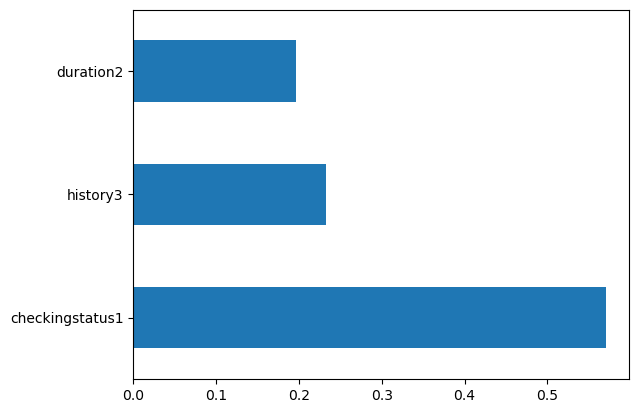

In [46]:
from sklearn import tree
# choose from different hyper parameters
clf=tree.DecisionTreeClassifier(max_depth=3,criterion='gini')

# printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring Accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

# printing the overall Accuracy of the model
F1_Score=metrics.f1_score(y_test,prediction,average='weighted')
print('Accuracy of the Model on Testing Sample Data:',round(F1_Score,2))

# Plotting feature importance of top 10 ,ost important columns
%matplotlib inline
feature_importances=pd.Series(DTree.feature_importances_,index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10 fold cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data automatically choose train/test.
Accuracy_Values=cross_val_score(LOG,X,y,cv=10,scoring='f1_weighted')
print('\n Accuracy values for 10 fold Cross validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

In [63]:
# Creating the model on full data for deployment
# exposing the model with all the data rows because we already avaluated accuracy above
# Now the model is ready for deployment in production
clf=tree.DecisionTreeClassifier(max_depth=3, criterion ='gini')
DTreeFinal=clf.fit(X,y)

## Individual Predictions

In [64]:
DataForML_Numeric.head()

,checkingstatus1,history3,purpose4,savings6,employ7,status9,others10,property12,otherplans14,housing15,foreign20,duration2,amount5,installment8,age13,GoodCredit
0,0,4,4,4,4,2,0,0,2,1,0,6,1169,4,67,0
1,1,2,4,0,2,1,0,0,2,1,0,48,5951,2,22,1
2,3,4,7,0,3,2,0,0,2,1,0,12,2096,2,49,0
3,0,2,3,0,3,2,2,1,2,2,0,42,7882,2,45,0
4,0,3,0,0,2,2,0,3,2,2,0,24,4870,3,53,1


In [65]:
Predictors

['checkingstatus1', 'duration2', 'history3']

In [66]:
# Creating some new data rows
NewData=pd.DataFrame(data=[[0,6,4],
                           [1,2,2],
                            [3,2,8]],columns=Predictors)
                           
NewData                                             

,checkingstatus1,duration2,history3
0,0,6,4
1,1,2,2
2,3,2,8


In [67]:
New_X=NewData.values
New_X

array([[0, 6, 4],
       [1, 2, 2],
       [3, 2, 8]], dtype=int64)

In [68]:
# Making sure that the new data is normalized using the same Normalization,PredictorScalerFit.
New_X=PredictorScalerFit.transform(New_X)
New_X

array([[ 0.        ,  0.03571429,  1.        ],
       [ 0.33333333, -0.03571429,  0.5       ],
       [ 1.        , -0.03571429,  2.        ]])

In [69]:
# Making the prediction using the final model
DTreeFinal.predict(New_X)

array([0, 0, 0], dtype=int64)

In [72]:
def GenerateSurvivalPred(inpData):
    New_X=inpData.values
    # Make sure that the new data is normalized using the same normalization PredictorScalerfit
    New_X=PredictorScalerFit.transform(New_X)
    Pred=DTreeFinal.predict(New_X)
    inpData['Prediction']=Pred
    return (inpData)

In [73]:
# calling the function with new input
PredData=GenerateSurvivalPred(inpData=NewData)
PredData

,checkingstatus1,duration2,history3,Prediction
0,0,6,4,0
1,1,2,2,0
2,3,2,8,0


In [74]:
# solving the prediction data as a file
PredData.to_csv('PredData.csv')

## Plotting a Decision Tree

In [75]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'c:\\users\\hp\\anaconda3\\lib'

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="checkingstatus1 <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [491, 209]\nclass = 0"] ;
1 [label="duration2 <= 0.33\ngini = 0.491\nsamples = 381\nvalue = [216, 165]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="history3 <= 0.375\ngini = 0.441\nsamples = 210\nvalue = [141, 69]\nclass = 0"] ;
1 -> 2 ;
3 [label="gini = 0.397\nsamples = 22\nvalue = [6, 16]\nclass = 1"] ;
2 -> 3 ;
4 [label="gini = 0.405\nsamples = 188\nvalue = [135, 53]\nclass = 0"] ;
2 -> 4 ;
5 [label="history3 <= 0.625\ngini = 0.492\nsamples = 171\nvalue = [75, 96]\nclass = 1"] ;
1 -> 5 ;
6 [label="gini = 0.465\nsamples = 114\nvalue = [42, 72]\nclass = 1"] ;
5 -> 6 ;
7 [label="gini = 0.488\nsamples = 57\nvalue = [33, 24]\nclass = 0"] ;
5 -> 7 ;
8 [label="history3 <= 0.875\ngini = 0.238\nsamples = 319\nvalue = [275, 44]\nclass = 0"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="F

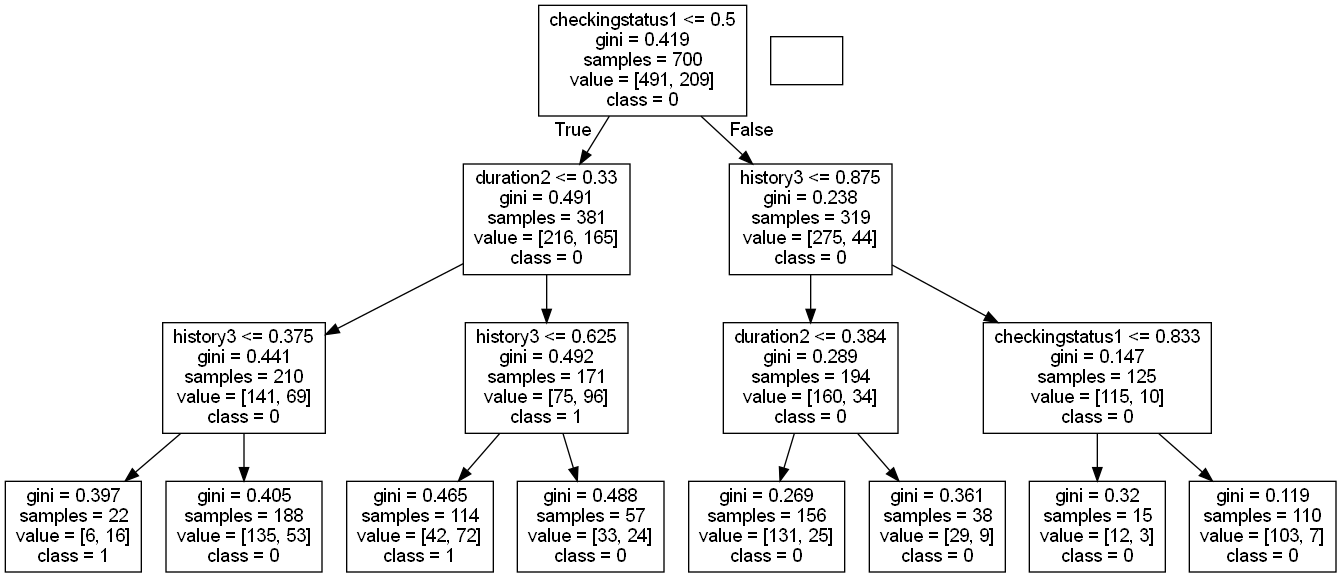

In [76]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTree, out_file=None, 
                                feature_names=Predictors, class_names=['0','1'])
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in

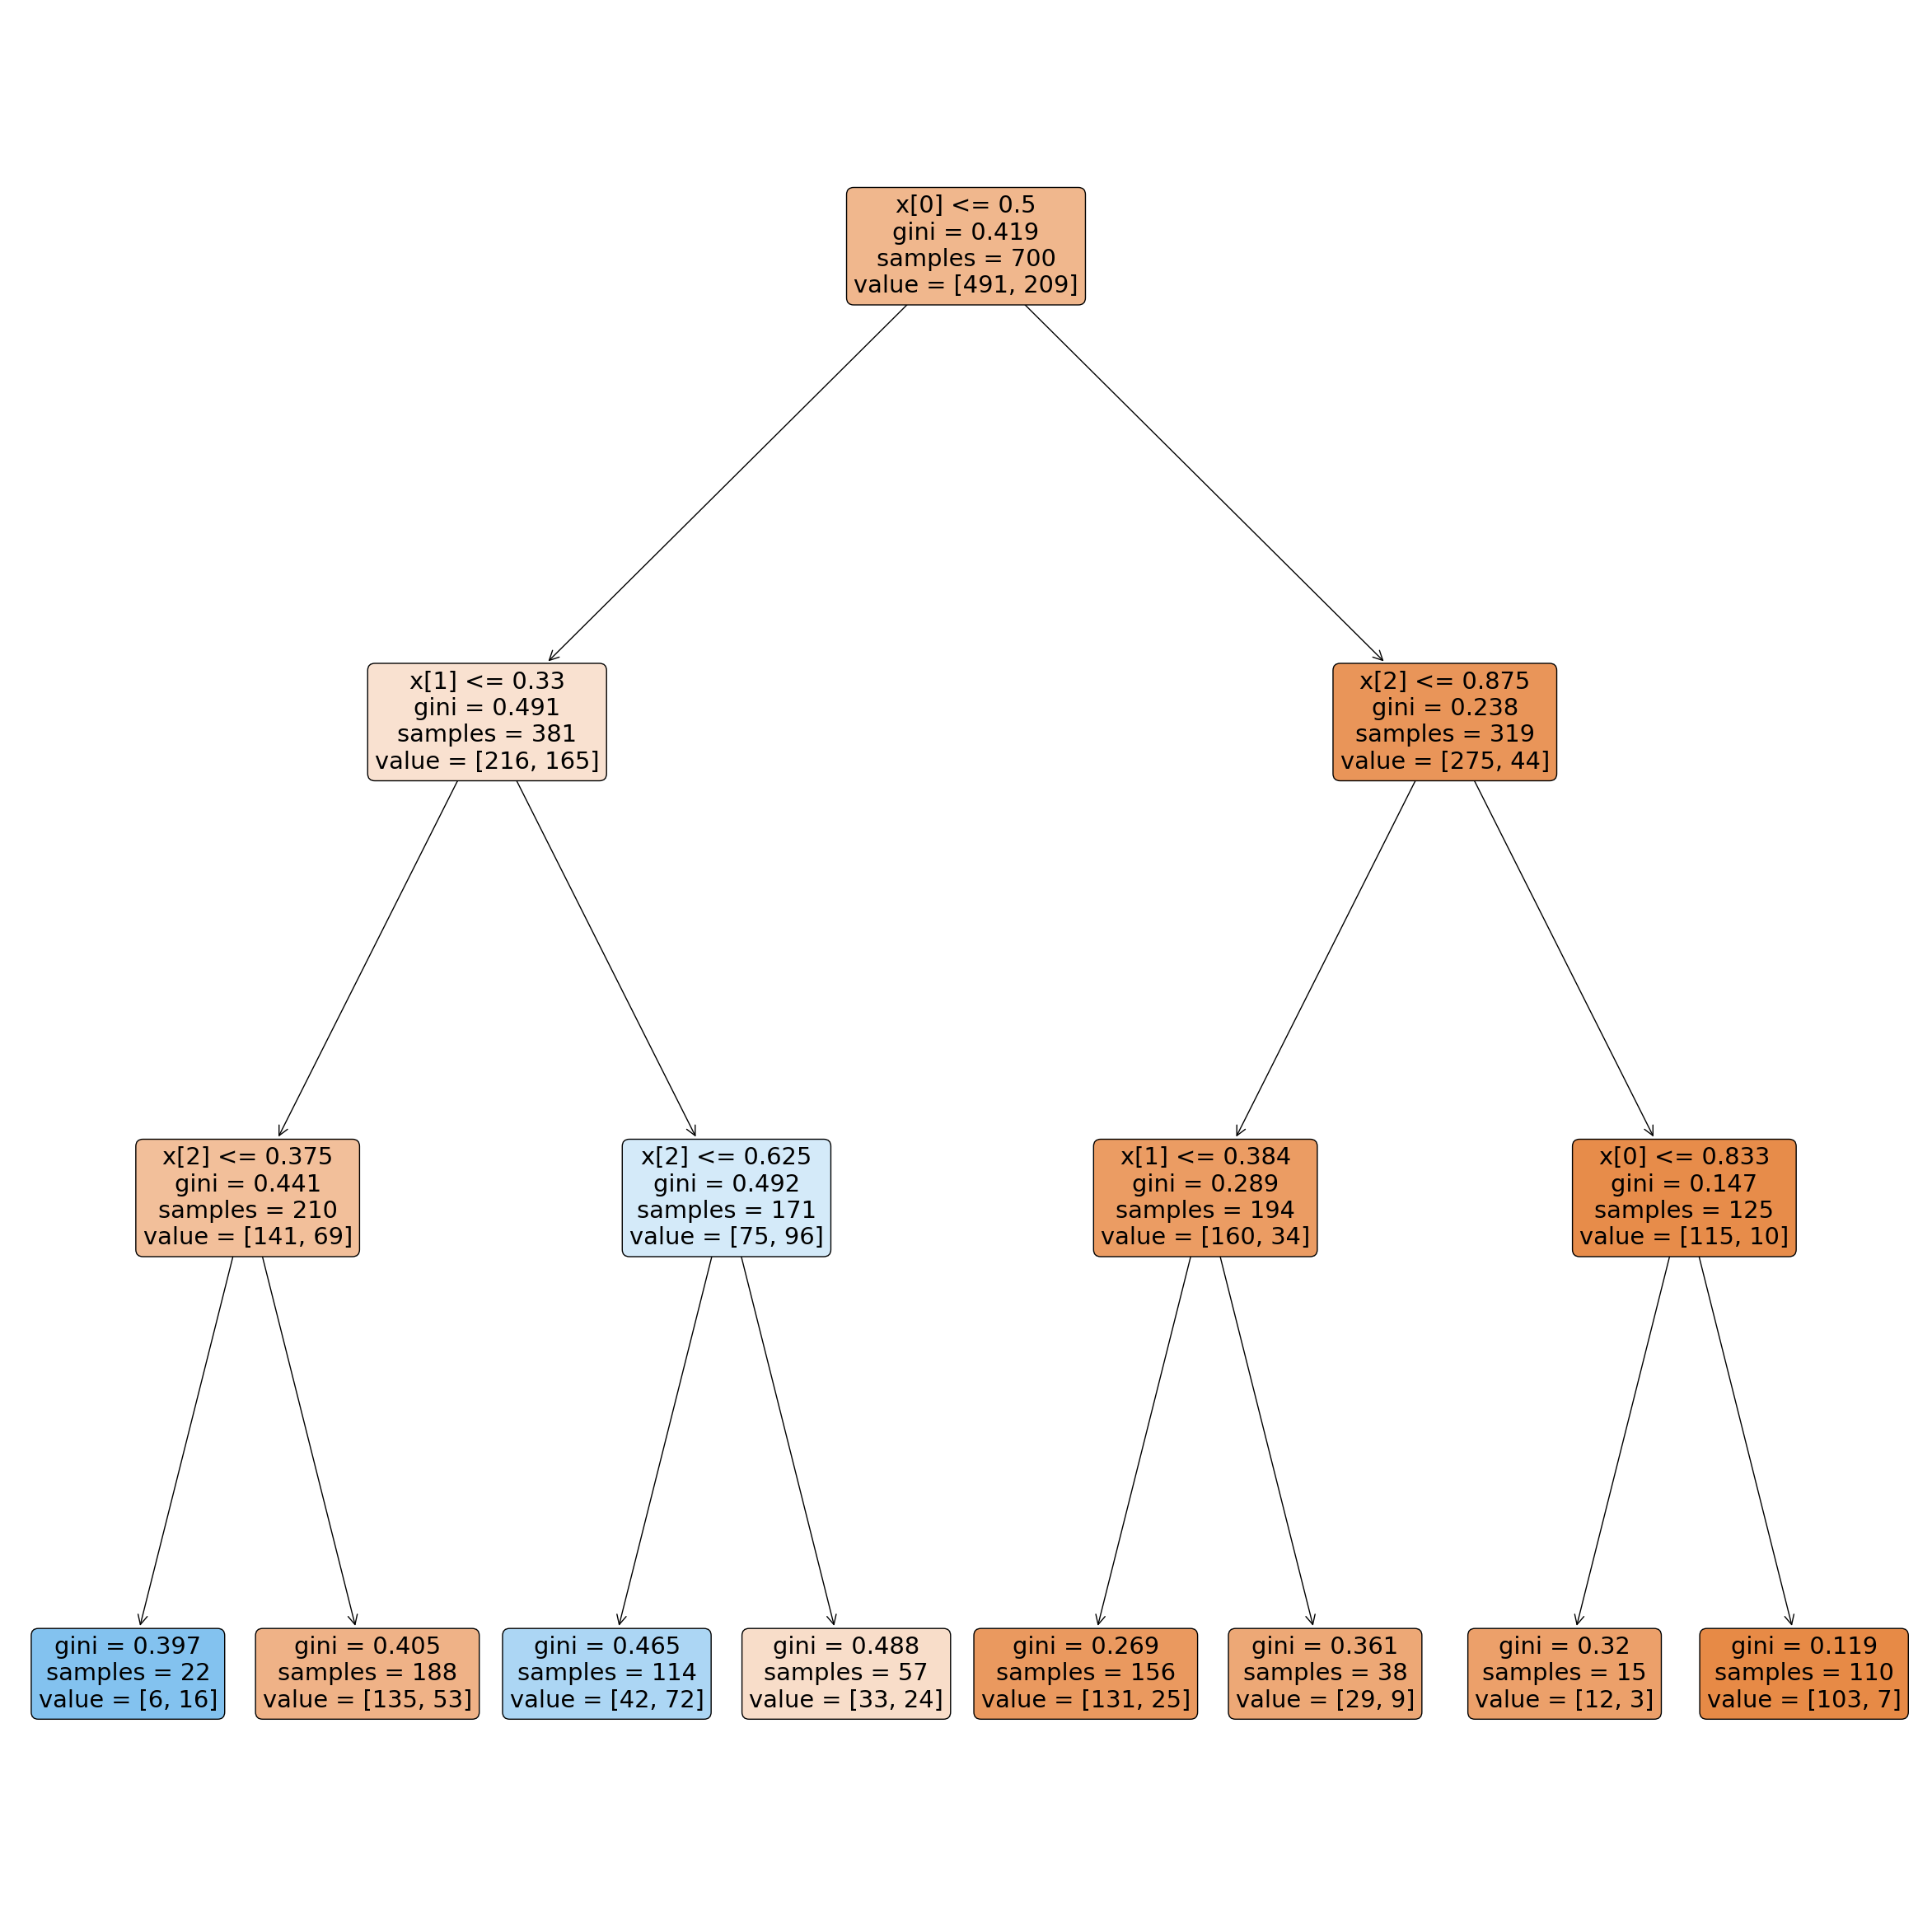

In [77]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30))
tree.plot_tree(DTree,filled=True,rounded=True, ax=axes)
plt.savefig('ClassificationDecisionTree.png')